In [1]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout
from keras.applications import VGG16
from keras.preprocessing.image import ImageDataGenerator

In [2]:
image_size = (100, 100)
batch_size = 32

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1
)

test_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    shear_range=0.2
)

In [4]:
train_generator = train_datagen.flow_from_directory(
    'train_directory2',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    'train_directory2',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 521 images belonging to 4 classes.
Found 521 images belonging to 4 classes.


In [5]:
# Load pre-trained VGG16 model without top layers
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(100, 100, 3))

model = Sequential()

# Add VGG16 base model
model.add(vgg16_base)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 256)               1179904   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 15895620 (60.64 MB)
Trainable params: 15895620 (60.64 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
# Freeze VGG16 base layers
vgg16_base.trainable = False

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_generator, epochs=20, validation_data=test_generator)

model.save('pcos_model_vgg.h5')

Epoch 1/20
17/17 [==============================] - 18s 1s/step - loss: 0.3433 - accuracy: 0.8637 - val_loss: 0.2561 - val_accuracy: 0.9079
Epoch 2/20
17/17 [==============================] - 16s 977ms/step - loss: 0.3825 - accuracy: 0.8503 - val_loss: 0.2507 - val_accuracy: 0.8887
Epoch 3/20
17/17 [==============================] - 16s 950ms/step - loss: 0.3621 - accuracy: 0.8637 - val_loss: 0.3018 - val_accuracy: 0.8887
Epoch 4/20
17/17 [==============================] - 16s 985ms/step - loss: 0.3568 - accuracy: 0.8541 - val_loss: 0.2418 - val_accuracy: 0.9194
Epoch 5/20
17/17 [==============================] - 17s 1s/step - loss: 0.3222 - accuracy: 0.8695 - val_loss: 0.2270 - val_accuracy: 0.9251
Epoch 6/20
17/17 [==============================] - 17s 1000ms/step - loss: 0.3213 - accuracy: 0.8733 - val_loss: 0.2547 - val_accuracy: 0.9002
Epoch 7/20
17/17 [==============================] - 18s 1s/step - loss: 0.3334 - accuracy: 0.8829 - val_loss: 0.2117 - val_accuracy: 0.9424
Epoch 8

c:\Users\kirti\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


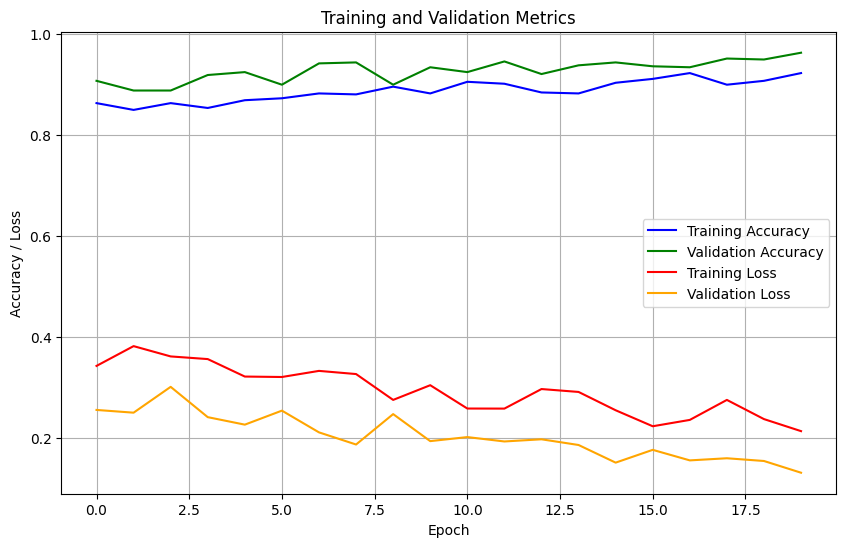

In [11]:
import matplotlib.pyplot as plt

# Plot all metrics on the same graph
plt.figure(figsize=(10, 6))

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='green')

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss', color='red')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')

plt.xlabel('Epoch')
plt.ylabel('Accuracy / Loss')
plt.title('Training and Validation Metrics')
plt.legend()
plt.grid(True)
plt.show()